In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
from sklearn import datasets
iris = datasets.load_iris()

In [4]:
# Reuse IRIS procesing code to dataframe from last homework:

# Create a DataFrame with the feature data
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target variable as a column
df['target'] = iris.target

# Optionally map the target numbers to target names
df['class'] = df['target'].map({i: name for i, name in enumerate(iris.target_names)})

df.head()

# Note I used AI to help me manipulate the iris dictionary data into a dataframe. 
# I was having a hard time processing the data as I did not know I needed to select the 
# data, feature_names and target separately. I was trying to use pd.DataFrame(iris)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


<Axes: xlabel='sepal width (cm)', ylabel='Count'>

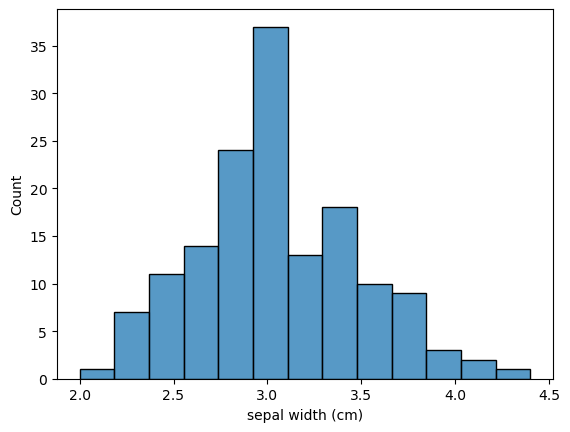

In [5]:
sns.histplot(df['sepal width (cm)'])

In [ ]:
"""
I would expect the mean to be higher than the median because the 
dataset appears to be slightly right skewed
"""

In [6]:
df['sepal width (cm)'].mean()

3.0573333333333337

In [7]:
df['sepal width (cm)'].median()

3.0

In [20]:
np.percentile(df['sepal width (cm)'], [73])[0]

#To find the threshold where only 27% of the flowers have a hgiher sepal width
#we want to find the 73rd quantile 


3.3

In [12]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [16]:
plot_df = df.drop(['target','class'], axis =1)

In [17]:
plot_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

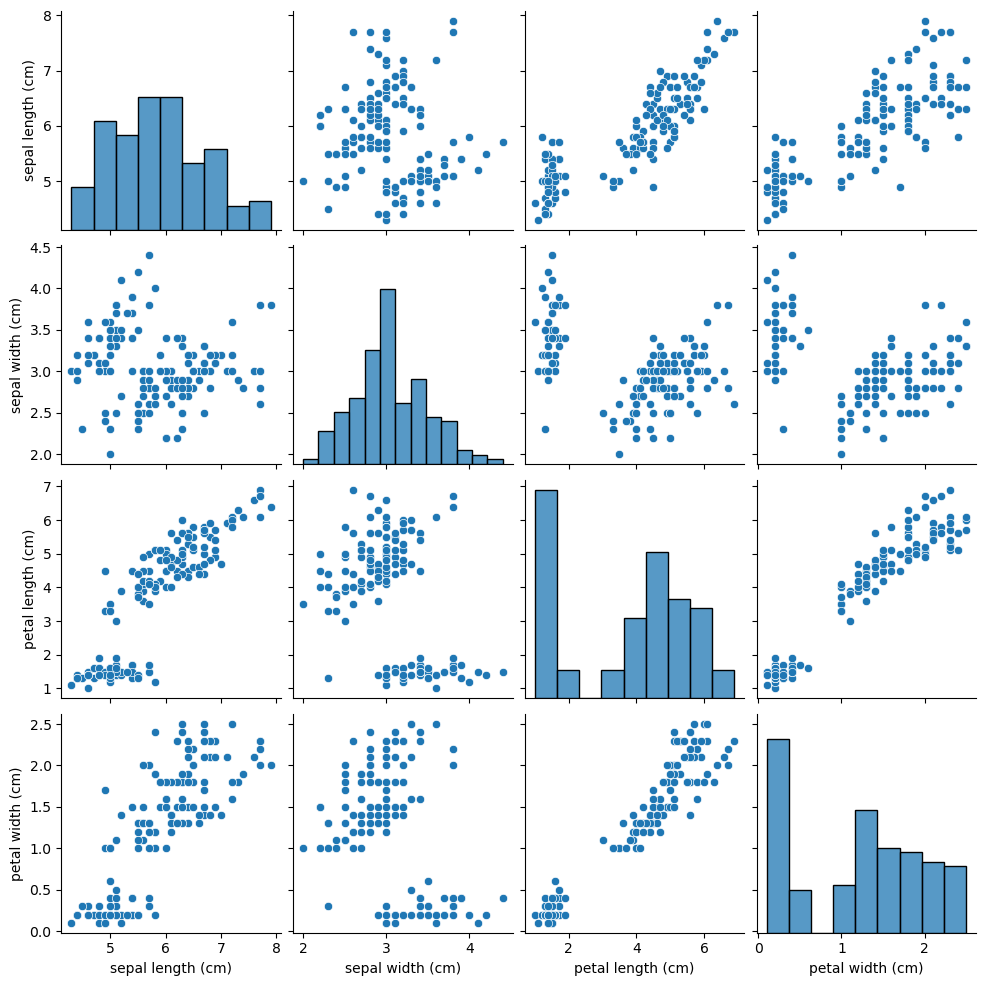

In [18]:
sns.pairplot(plot_df, markers='o')

In [19]:
"""
In the scatteplot matrix we see the 6 scatteplots to the left of the 
histograms in the diagonal. Mirrored across the diagonal line we see
the same relationships but with x and y axis reversed. 
"""

'\nIn the scatteplot matrix we see the 6 scatteplots to the left of the \nhistograms in the diagonal. Mirrored across the diagonal line we see\nthe same relationships but with x and y axis reversed. \n'

In [ ]:
"""
For Many of the realtionships there are signs that behavior is different or clustered 
amoung groups of the dataset likely the different classes. Just loooking at it visually
without running the R^2 it looks like petal length and petal width have the clearest
or strongest linear relationship. To me sepal length and sepal width appear to have the most
scattered or weakest relationship.
"""

In [23]:
data = { "weight": [4.17, 5.58, 5.18, 6.11, 4.50, 4.61, 5.17, 4.53, 5.33, 5.14, 4.81, 4.17,
                    4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 4.32, 4.69, 6.31, 5.12, 5.54, 5.50,
                    5.37, 5.29, 4.92, 6.15, 5.80, 5.26], "group": ["ctrl"] * 10 + ["trt1"] * 10 + ["trt2"] * 10}
PG = pd.DataFrame(data)

In [24]:
PG.head()

,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl


In [31]:
PG.group.value_counts()

group
ctrl    10
trt1    10
trt2    10
Name: count, dtype: int64

<Axes: xlabel='weight', ylabel='Count'>

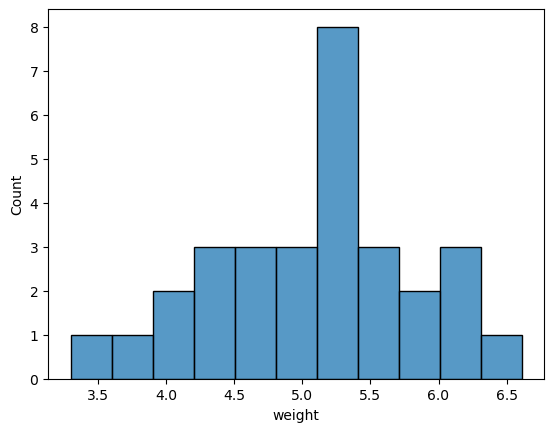

In [30]:
sns.histplot(PG.weight, binwidth=.3, binrange=[3.3,PG.weight.max()+.3])

<Axes: xlabel='group', ylabel='weight'>

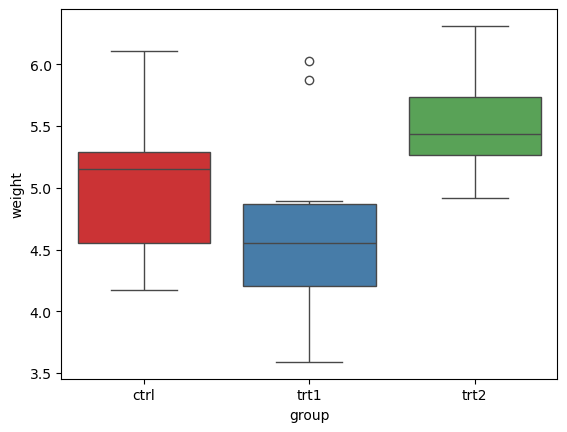

In [44]:
sns.boxplot(x="group", y="weight", data=PG, hue="group", palette="Set1")

In [ ]:
"""
It looks like nearly 100% of the trt1 weights are below the minimum trt2 weight
other than the two outlier values
"""

In [49]:
PG.groupby("group").agg({"weight":["min","max"]
                        })
# checking the min and max for each group to see 
#The max trt1 is above the min trt2

weight      
         min   max
group             
ctrl    4.17  6.11
trt1    3.59  6.03
trt2    4.92  6.31

In [59]:
trt2_min = PG[PG["group"] == "trt2"].weight.min()


In [60]:
# need to store the trt2_min in a variable for comparing 
# to the trt1 weights

trt2_min

4.92

In [66]:
#create a separate series for the trt1 weights
#sum the count that are less than tt2_min
#divide by length to get the result as a percentage
#Looks like exactly 80% are less than the trt2 min


(PG[PG["group"] == "trt1"]["weight"] < trt2_min).sum() / len(PG[PG["group"] == "trt1"]["weight"])

0.8

In [67]:
above_df = PG[PG.weight > 5.5]

In [68]:
above_df

,weight,group
1,5.58,ctrl
3,6.11,ctrl
14,5.87,trt1
16,6.03,trt1
20,6.31,trt2
22,5.54,trt2
27,6.15,trt2
28,5.80,trt2


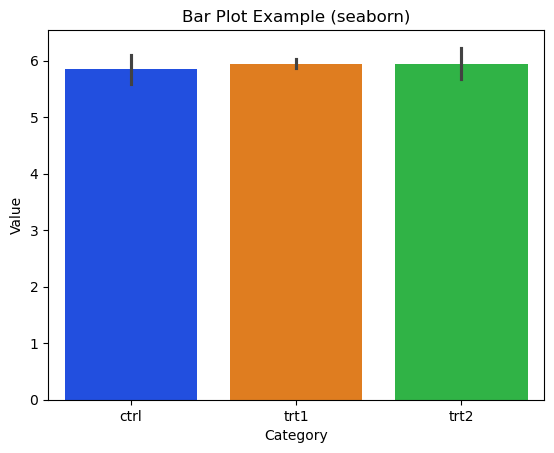

In [81]:
#Reuse the code given in the lectures to create the Barplot for values
#using above_df we have already filtered for weights above 5.5
#with the basic bar plot we can see the maximum value for is group is about the same

sns.barplot(x=above_df.group, y=above_df.weight, hue=above_df.group, palette="bright")
plt.title("Bar Plot Example (seaborn)")
plt.xlabel("Category")
plt.ylabel("Value")
plt.show()

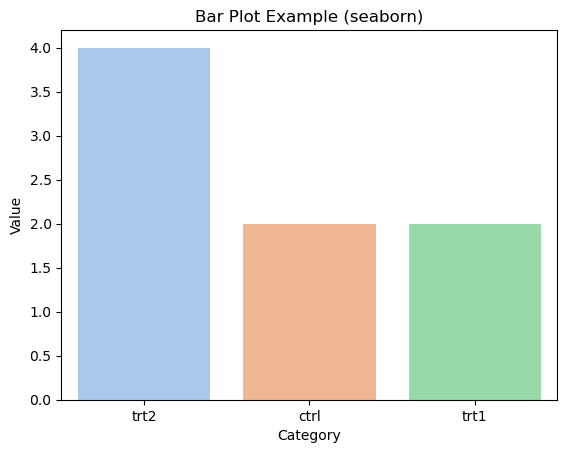

In [79]:
#Reuse the code given in the lectures to create the Barplot for frequency counts 
#using above_df we have already filtered for weights above 5.5

# Data for the bar plot
frequency_table = above_df['group'].value_counts() # create frequency table (equivlanet to table(cyl_cat))

labels_int = frequency_table.index.tolist() # returns the names, which are integers (cylinders) in this case
labels = list(map(str, labels_int)) # convert those integers to strings
values = frequency_table.values

# Create the bar plot
sns.barplot(x=labels, y=values, hue=labels, palette="pastel")
plt.title("Bar Plot Example (seaborn)")
plt.xlabel("Category")
plt.ylabel("Value")
plt.show()